In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df= pd.read_csv("SalesDataAdidas.csv", header=4)
df.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store


OVERVIEW OF THE DATA

In [9]:
print(df.describe())
print(df.info())

        Retailer ID
count  9.648000e+03
mean   1.173850e+06
std    2.636038e+04
min    1.128299e+06
25%    1.185732e+06
50%    1.185732e+06
75%    1.185732e+06
max    1.197831e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), objec

In [11]:
#Check for any missing value 
print(df.isnull().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


In [13]:
df.drop_duplicates().head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store


In [15]:
from datetime import datetime as dt
df['Invoice Date']=pd.to_datetime(df['Invoice Date'],  format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 980.0+ KB


In [25]:
#ConvertData Tyoe 
df.info()
"""convert_column=[ 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']
for col in convert_column:
   df[col]=pd.to_numeric(df[col].str.replace('[\$,]','', regex=True).replace(',','',regex=True),errors='coerce').astype(float)
df['Operating Margin'] = df['Operating Margin'].str.rstrip('%').astype(float)"""
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28.0,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32.0,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37.0,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42.0,Outlet


In [27]:
df=df.rename(columns={'Operating Margin':'Operating Margin %'})
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28.0,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32.0,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37.0,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42.0,Outlet


In [ ]:
#Exploratory data analysis 

In [29]:
#1 summary stistics 
summary_stats=df.describe()
print(summary_stats)

        Retailer ID                   Invoice Date  Price per Unit  \
count  9.648000e+03                           9648     9648.000000   
mean   1.173850e+06  2021-05-10 15:20:44.776119296       45.216625   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636038e+04                            NaN       14.705397   

        Units Sold    Total Sales  Operating Profit  Operating Margin %  
count  9648.000000    9648.000000       9648.000000         9648.000000  
mean    256.930037   93273.437500      34425.282131           42.299129  
min       0.000000       0.000000          0.000000           10.000000  
25%     106.000000    4254.500000       1922.000000           35.000000  

Data Visulaization

In [31]:
df['Year']=df['Invoice Date'].dt.year
df['Month']=df['Invoice Date'].dt.month
df["Total Sales"]=df["Price per Unit"]*df["Units Sold"]
df["Operating Profit"]=df["Total Sales"]*df["Operating Margin %"]/100
df.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,50000.0,15000.0,30.0,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,40000.0,14000.0,35.0,In-store,2020,1


Retailer

In [33]:
df.Retailer.value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

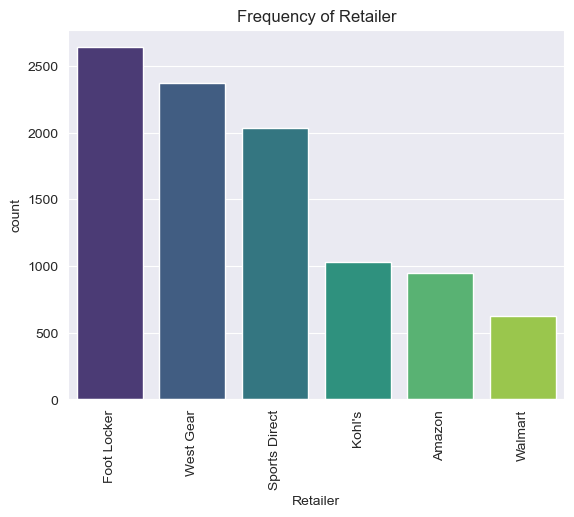

<Figure size 1000x600 with 0 Axes>

In [35]:
sns.set_style("darkgrid")
plt.xticks(rotation = 90)
sns.countplot(data=df, x="Retailer", order=df.Retailer.value_counts().index,palette='viridis')
plt.title("Frequency of Retailer")
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
#Region wise value 

In [37]:
df.Region.value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

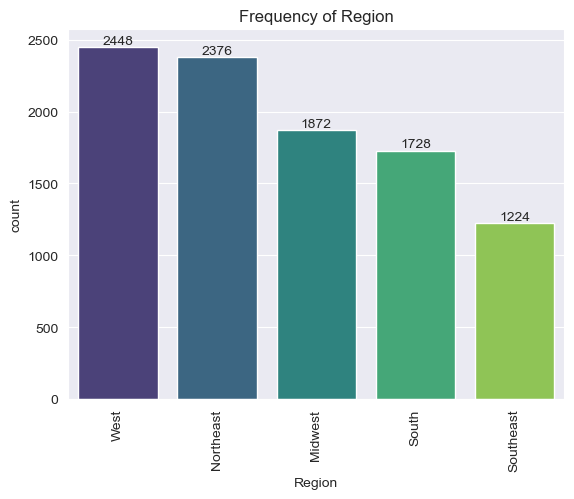

<Figure size 1000x600 with 0 Axes>

In [39]:
sns.set_style("darkgrid")
plt.xticks(rotation = 90)
figer=sns.countplot(data=df, x="Region", order=df.Region.value_counts().index,palette='viridis')
for container in figer.containers :
    figer.bar_label(container)
plt.title("Frequency of Region")
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
#Frequency of Product 

In [41]:
df.Product.value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

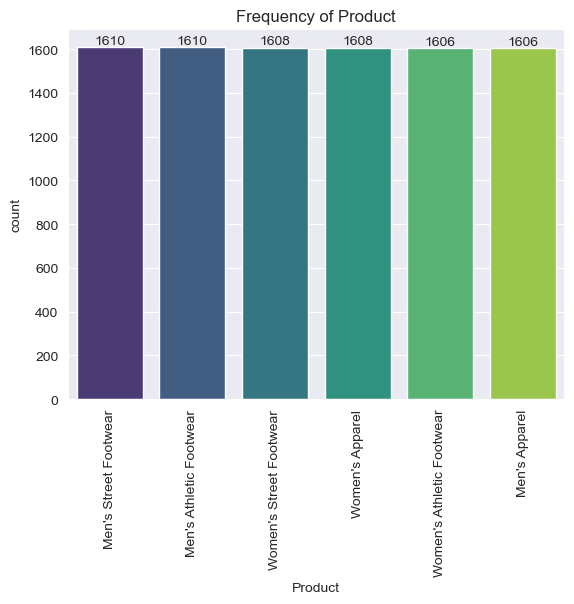

<Figure size 1000x600 with 0 Axes>

In [43]:
sns.set_style("darkgrid")
plt.xticks(rotation=90)
image=sns.countplot(data=df, x="Product", order= df.Product.value_counts().index, palette='viridis')
for container in image.containers:
    image.bar_label(container)
plt.title("Frequency of Product")
plt.figure(figsize=(10,6))
plt.show()

In [45]:
df["Units Sold"].max()

1275.0

In [47]:
df["Gender"]=df["Product"].str.contains("Men")
df.Gender=df.Gender.map({True:"Male", False:"Female"})
df.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,50000.0,15000.0,30.0,In-store,2020,1,Male
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,40000.0,14000.0,35.0,In-store,2020,1,Female


In [210]:
df.describe().round(2)

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Year,Month
count,9648.00,9648,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00
mean,1173849.72,2021-05-10 15:20:44.776119296,45.22,256.93,12455.08,4894.79,42.30,2020.87,6.46
min,1128299.00,2020-01-01 00:00:00,7.00,0.00,0.00,0.00,10.00,2020.00,1.00
25%,1185732.00,2021-02-17 00:00:00,35.00,106.00,4065.25,1753.44,35.00,2021.00,3.00
50%,1185732.00,2021-06-04 00:00:00,45.00,176.00,7803.50,3262.98,41.00,2021.00,6.00
75%,1185732.00,2021-09-16 00:00:00,55.00,350.00,15864.50,6192.36,49.00,2021.00,9.00
max,1197831.00,2021-12-31 00:00:00,110.00,1275.00,82500.00,39000.00,80.00,2021.00,12.00
std,26360.38,NaN,14.71,214.25,12716.39,4866.46,9.72,0.34,3.45


Sales By different Group

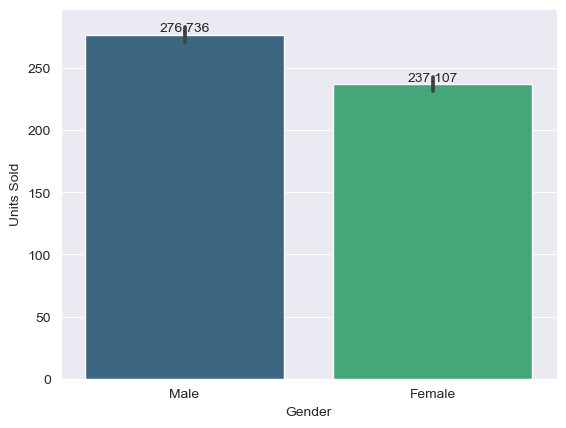

In [54]:
#Sales :Men and Women
figer= sns.barplot(data= df ,x="Gender" , y="Units Sold", palette='viridis')
for contain in figer.containers :
    figer.bar_label(contain)

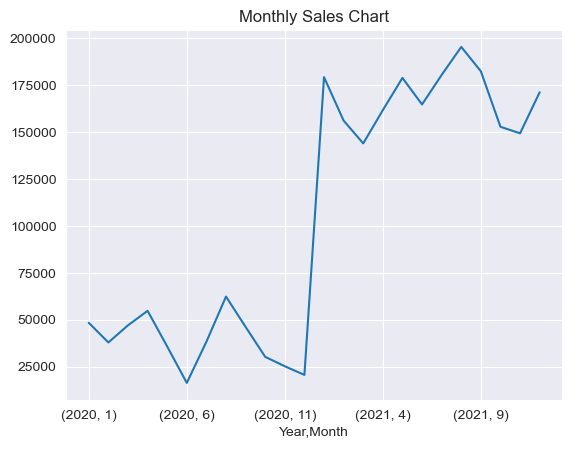

In [76]:
#Monthly Sales Chart 
df.groupby(["Year", "Month"])["Units Sold"].sum().plot.line()
plt.title("Monthly Sales Chart")
plt.show()

In [82]:
#Reason 
df.pivot_table(index="Year", columns="Month", values="Units Sold", aggfunc="sum")

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


In [84]:
df.pivot_table(index=["Year", "Month"], columns="Retailer", values="Units Sold", aggfunc="sum")

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
Year Month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

In [109]:
#Total Sales By different Group 

In [127]:
Region_Sales = df.groupby("Region")["Total Sales"].sum().reset_index()
Region_Sales

,Region,Total Sales
0,Midwest,16674434.0
1,Northeast,25078267.0
2,South,20603356.0
3,Southeast,21374436.0
4,West,36436157.0


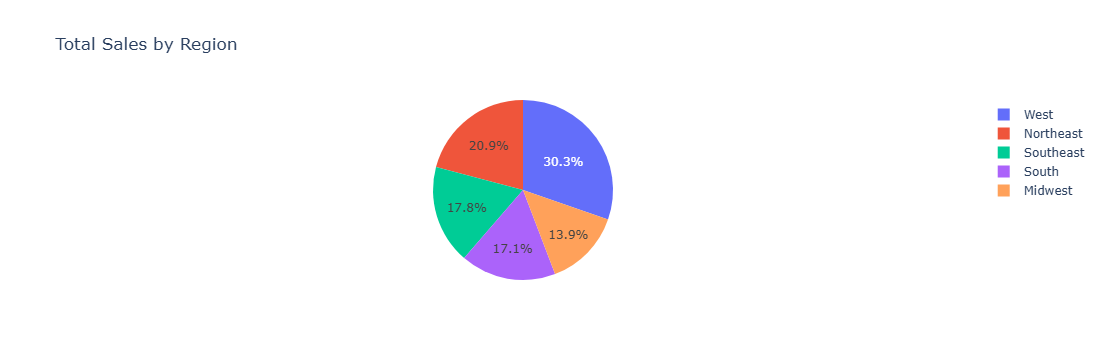

In [143]:
import plotly.express as px
px.pie(Region_Sales, values="Total Sales", names="Region",title="Total Sales by Region")

In [ ]:
#Top Selling City and Bottom Selling City 

In [163]:
top_state=df.groupby("State")["Total Sales"].sum().nlargest(5).reset_index()
bottom_state=df.groupby("State")["Total Sales"].sum().nsmallest(5).reset_index()
print(top_state)
print(bottom_state)


df["City_State"]=df["City"]+" "+df["State"]
top_city=df.groupby("City_State")["Total Sales"].sum().nlargest(5).reset_index()
bottom_city=df.groupby("City_State")["Total Sales"].sum().nsmallest(5).reset_index()
print(top_city)
print(bottom_city)

            State  Total Sales
0        New York    8670464.0
1      California    8580508.0
2         Florida    7820589.0
3           Texas    6612371.0
4  South Carolina    3593112.0
          State  Total Sales
0      Nebraska     728838.0
1     Minnesota     903918.0
2          Iowa     909811.0
3     Wisconsin     948894.0
4  North Dakota     950930.0
                 City_State  Total Sales
0         New York New York    5676160.0
1  San Francisco California    4929220.0
2           Orlando Florida    3946476.0
3             Miami Florida    3874113.0
4    Los Angeles California    3651288.0
              City_State  Total Sales
0         Omaha Nebraska     728838.0
1  Minneapolis Minnesota     903918.0
2        Des Moines Iowa     909811.0
3    Milwaukee Wisconsin     948894.0
4     Fargo North Dakota     950930.0


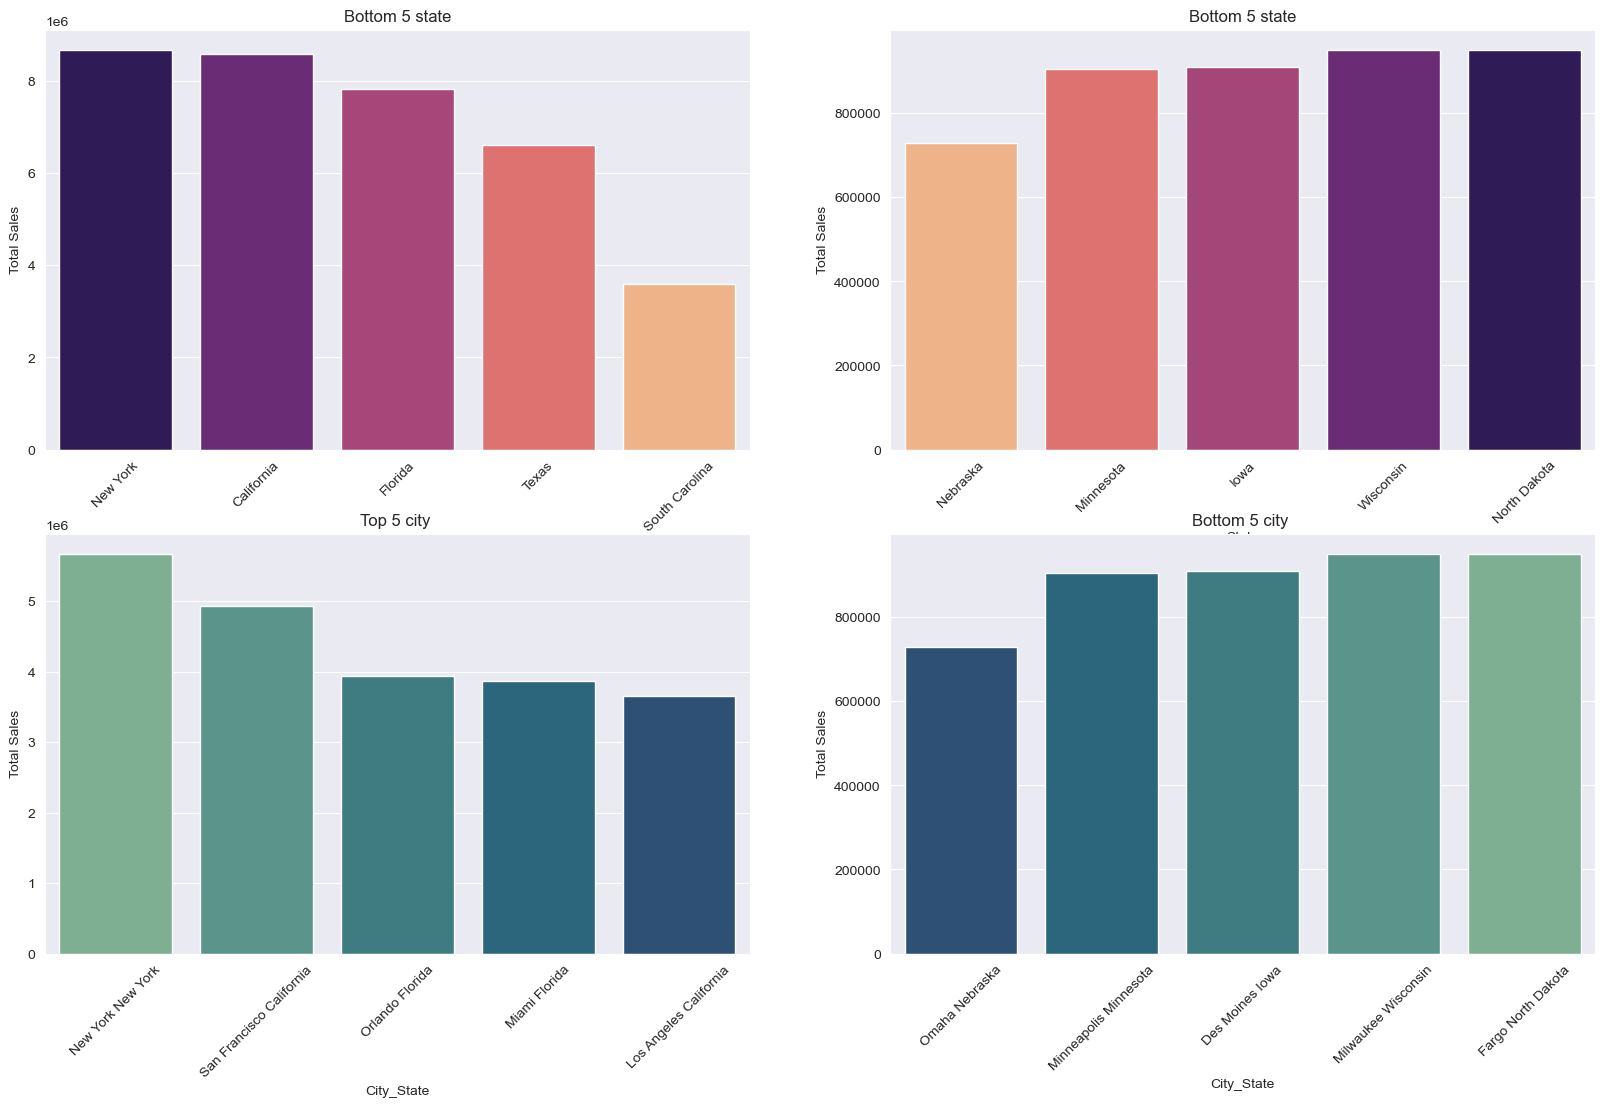

In [231]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
sns.barplot(x="State", y="Total Sales", data=top_state,palette='magma',ax=axes[0,0])
axes[0,0].set_title("Bottom 5 state")
axes[0,0].tick_params(axis='x', rotation=45)
#Bottom 5 state    
sns.barplot(x="State", y="Total Sales", data=bottom_state,palette='magma_r',ax=axes[0,1])
axes[0,1].set_title("Bottom 5 state")
axes[0,1].tick_params(axis='x', rotation=45)

#Top 5 Cities 
sns.barplot(x="City_State", y="Total Sales", data=top_city, palette="crest", ax= axes[1,0])
axes[1,0].set_title("Top 5 city ")
axes[1,0].tick_params(axis="x", rotation=45)


#Bottpm 5 Cities 
sns.barplot(x="City_State", y="Total Sales", data=bottom_city, palette="crest_r", ax= axes[1,1])
axes[1,1].set_title("Bottom 5 city ")
axes[1,1].tick_params(axis="x", rotation=45)

plt.show()

In [235]:
#Sales Method bY Totals sales 
SalesMethod=df.groupby("Sales Method")["Total Sales"].sum().reset_index()
SalesMethod

,Sales Method,Total Sales
0,In-store,35664375.0
1,Online,44965657.0
2,Outlet,39536618.0


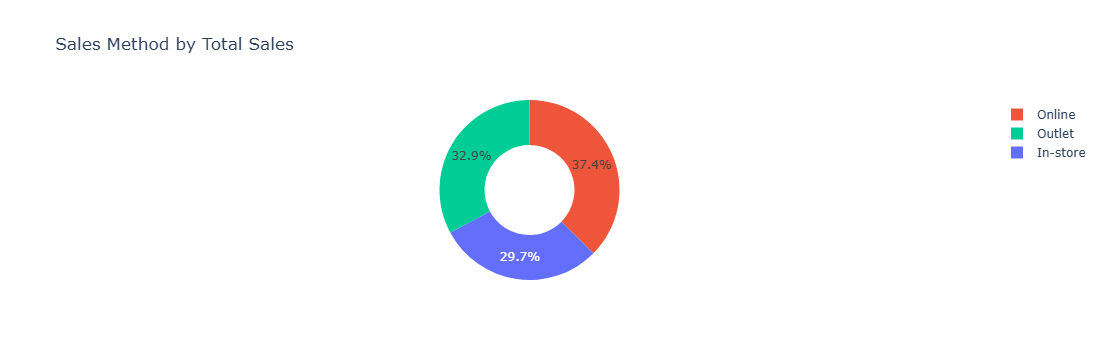

In [239]:
colors=['#ADD8E6','#90EE90','#FFB6C1']
px.pie(SalesMethod,title="Sales Method by Total Sales", values="Total Sales", names="Sales Method", hole=0.5, color=colors)

In [449]:
df.head(1)


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male,New York New York


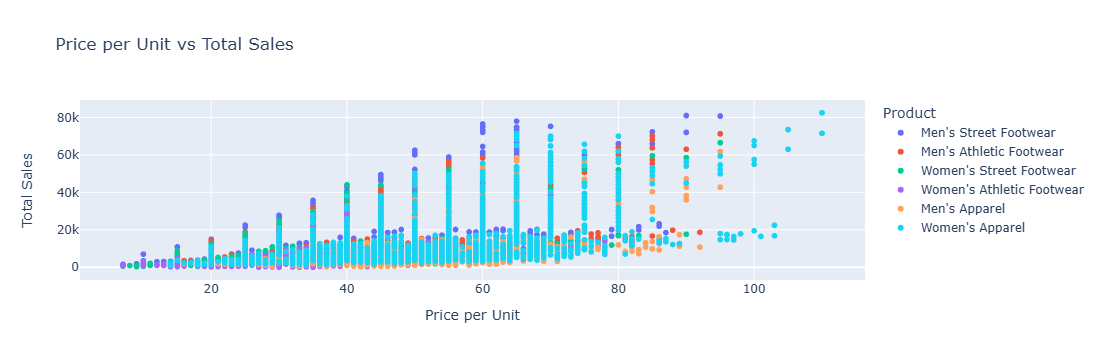

In [447]:
px.scatter(df, x='Price per Unit', y='Total Sales', title='Price per Unit vs Total Sales', color = "Product")

In [243]:
yearly_sales = df.groupby(['Year','Month'])['Total Sales'].sum().reset_index()
yearly_sales

,Year,Month,Total Sales
0,2020,1,2312746.0
1,2020,2,2140813.0
2,2020,3,2474202.0
3,2020,4,3193081.0
4,2020,5,2164764.0
5,2020,6,1084194.0
6,2020,7,2182388.0
7,2020,8,2641630.0
8,2020,9,2367686.0
9,2020,10,1428569.0


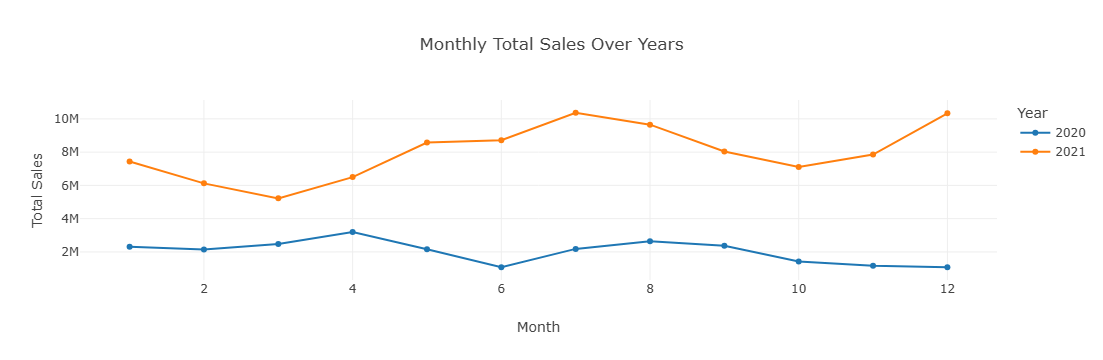

In [453]:
px.line(yearly_sales, x="Month", y="Total Sales", color="Year", markers=True, template= "none",title="Monthly Total Sales Over Years") 

In [257]:
#mOnthly totla profit over yea 
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male,New York New York


In [263]:
#monthly total profit over year
Monthly_Profit=df.groupby(["Month","Year"])["Operating Profit"].sum().reset_index()
Monthly_Profit

,Month,Year,Operating Profit
0,1,2020,883774.16
1,1,2021,2766160.35
2,2,2020,796848.19
3,2,2021,2282519.76
4,3,2020,879268.76
5,3,2021,2067129.24
6,4,2020,1275442.09
7,4,2021,2644237.72
8,5,2020,800635.70
9,5,2021,3456570.88


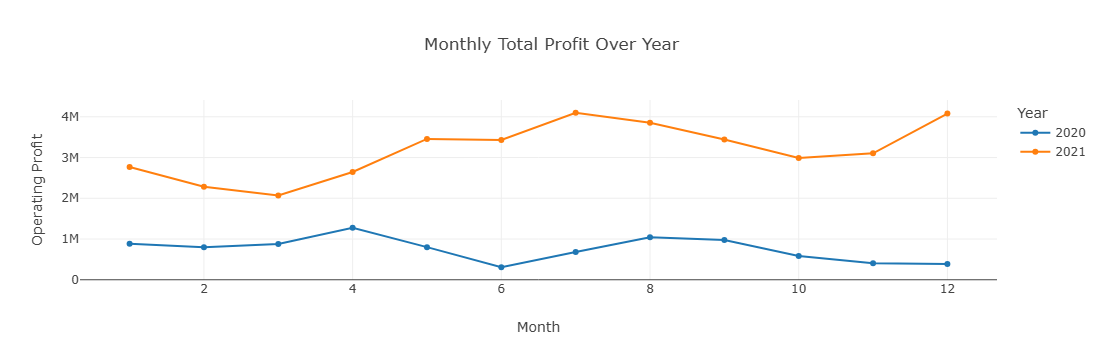

In [455]:
px.line(Monthly_Profit, x="Month", y="Operating Profit", color="Year" ,markers=True, template="none", title="Monthly Total Profit Over Year")

In [293]:
#title='Monthly Total Sales Over Years'

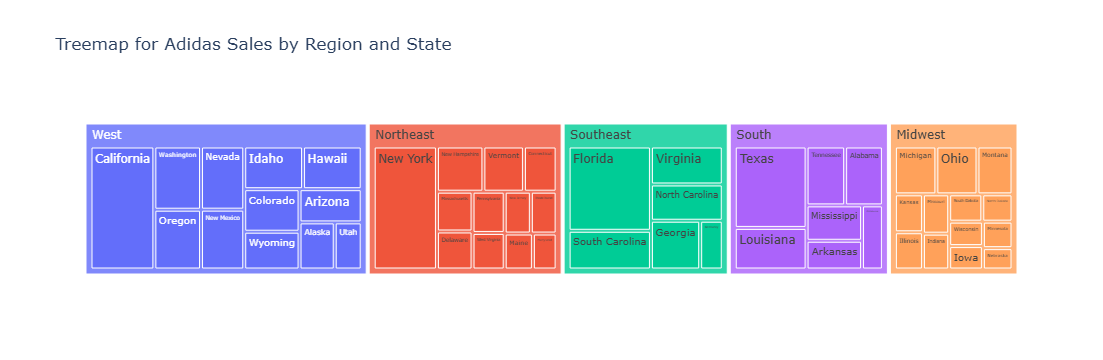

In [295]:
px.treemap(df,values='Total Sales', path=['Region', 'State'],
                 title='Treemap for Adidas Sales by Region and State')

In [297]:
#Question Most Popular product for each retailr 
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male,New York New York


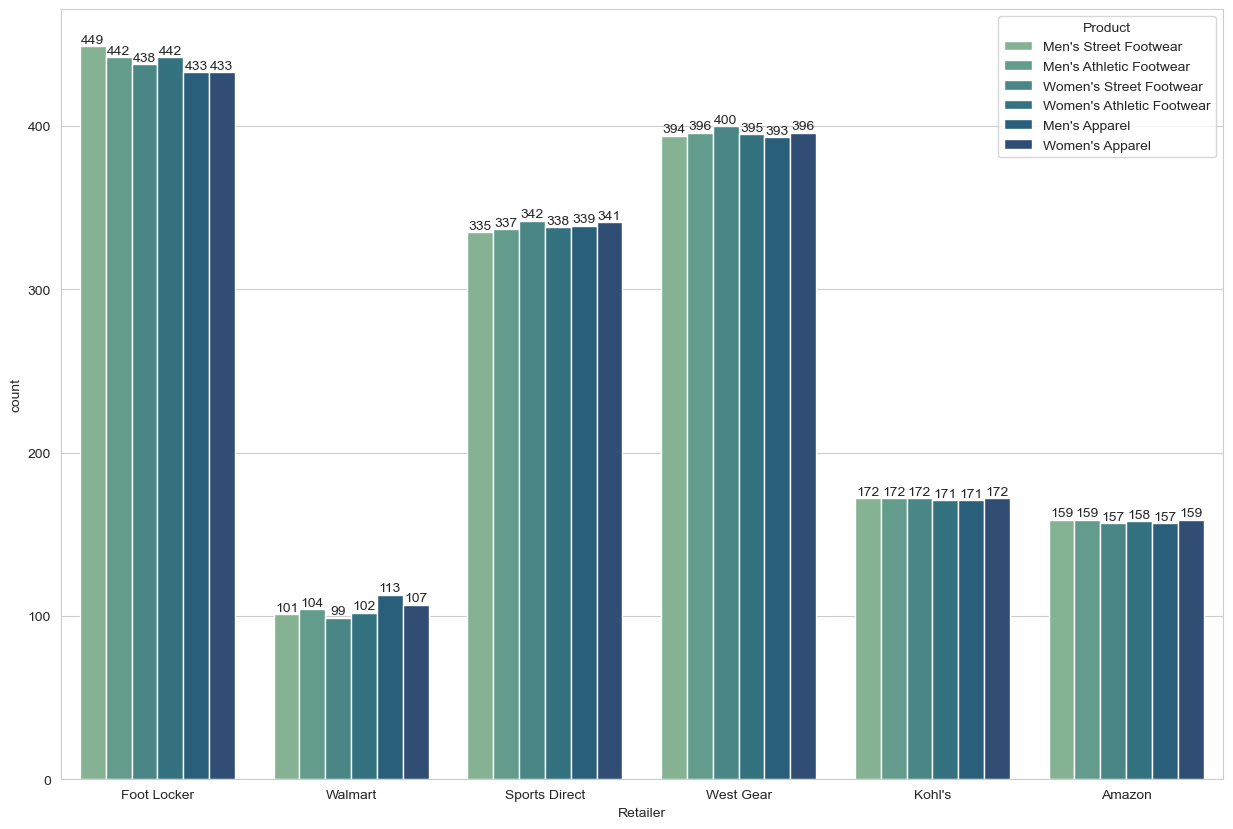

In [313]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
figure=sns.countplot(x="Retailer", hue="Product", data=df , palette="crest")
for container in figure.containers:
    figure.bar_label(container)
plt.show()

In [315]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male,New York New York


In [319]:
#most popular product of top 5 cities 
print(top_city)

                 City_State  Total Sales
0         New York New York    5676160.0
1  San Francisco California    4929220.0
2           Orlando Florida    3946476.0
3             Miami Florida    3874113.0
4    Los Angeles California    3651288.0


In [321]:
Top_City=["Portland","Charleston","Los Angeles","Philadelphia","Birmingham" ]
df_top5City=df[df.City.isin(Top_City)].copy()
df_top5City.sample(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
8158,Foot Locker,1185732,2021-11-17,Northeast,Pennsylvania,Philadelphia,Women's Street Footwear,38.0,53.0,2014.0,745.18,37.0,Outlet,2021,11,Female,Philadelphia Pennsylvania
4968,Sports Direct,1197831,2021-08-05,South,Alabama,Birmingham,Men's Apparel,37.0,88.0,3256.0,1562.88,48.0,Online,2021,8,Male,Birmingham Alabama
8656,West Gear,1128299,2021-05-25,West,Oregon,Portland,Men's Athletic Footwear,36.0,109.0,3924.0,1569.60,40.0,Outlet,2021,5,Male,Portland Oregon
8195,Foot Locker,1185732,2021-12-24,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,43.0,60.0,2580.0,1186.80,46.0,Outlet,2021,12,Female,Philadelphia Pennsylvania
1898,West Gear,1128299,2021-06-24,West,Oregon,Portland,Women's Apparel,105.0,700.0,73500.0,22050.00,30.0,In-store,2021,6,Female,Portland Oregon


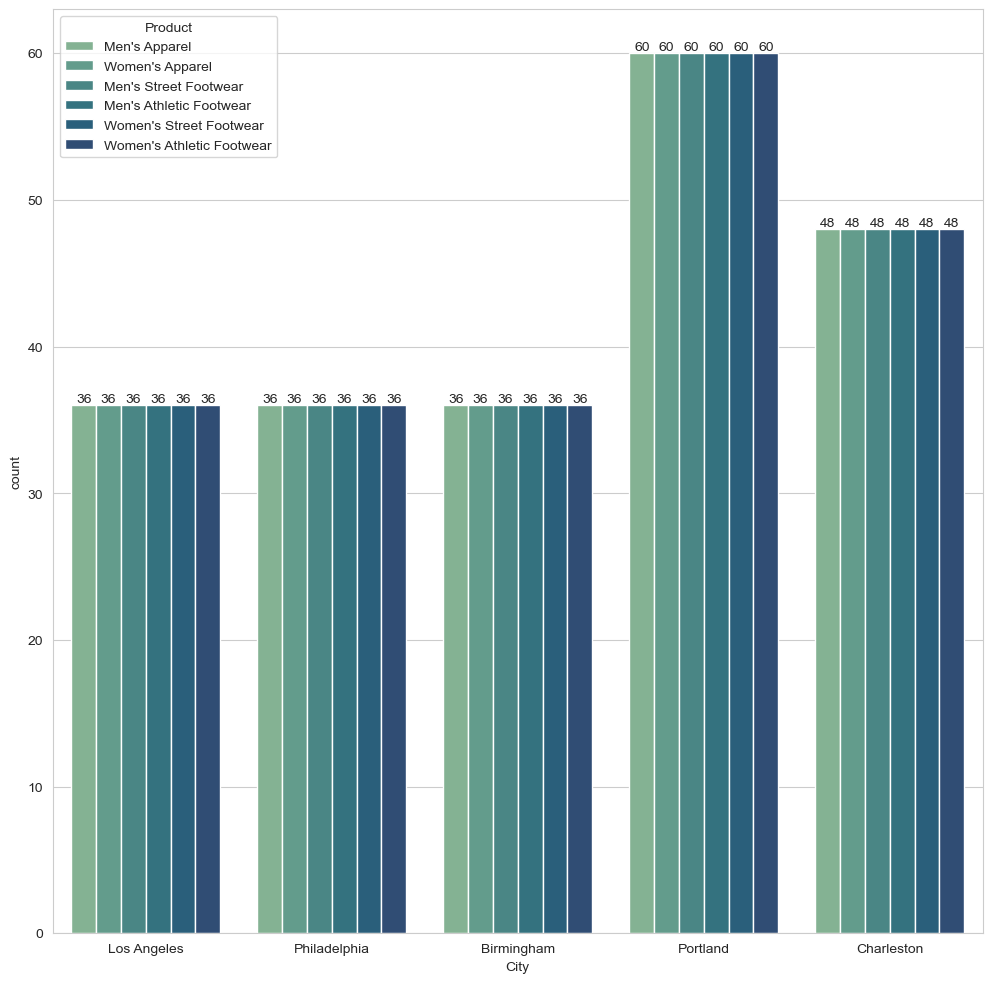

In [327]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
figure=sns.countplot(x="City", hue="Product", data=df_top5City , palette="crest")
for container in figure.containers:
    figure.bar_label(container)
plt.show()

In [331]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male,New York New York


C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Regiona versus Profit')

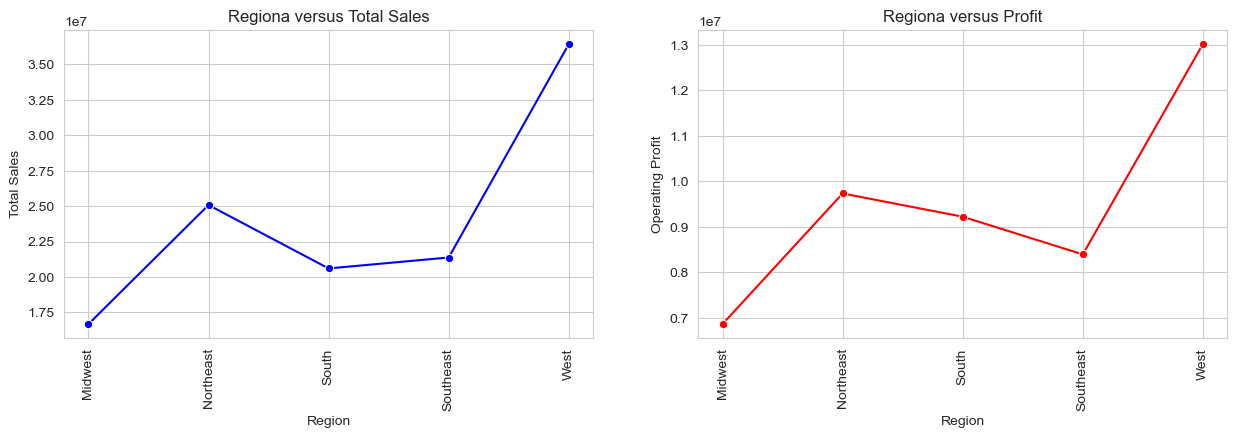

In [385]:
#region wise Profit and sales
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
Region_Profit=df.groupby("Region")["Total Sales"].sum().reset_index()
plt.xticks(rotation=90)
sns.lineplot(data= Region_Profit , x="Region" ,y="Total Sales" ,marker="o" , color="blue" )
plt.title("Regiona versus Total Sales")

#region wise Profit
plt.subplot(1,2,2)
Region_Profit1=df.groupby("Region")["Operating Profit"].sum().reset_index()
plt.xticks(rotation=90)
sns.lineplot(data= Region_Profit1 , x="Region" ,y="Operating Profit" ,marker="o", color="red" )
plt.title("Regiona versus Profit")

In [387]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin %,Sales Method,Year,Month,Gender,City_State
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store,2020,1,Male,New York New York


In [494]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\nehar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

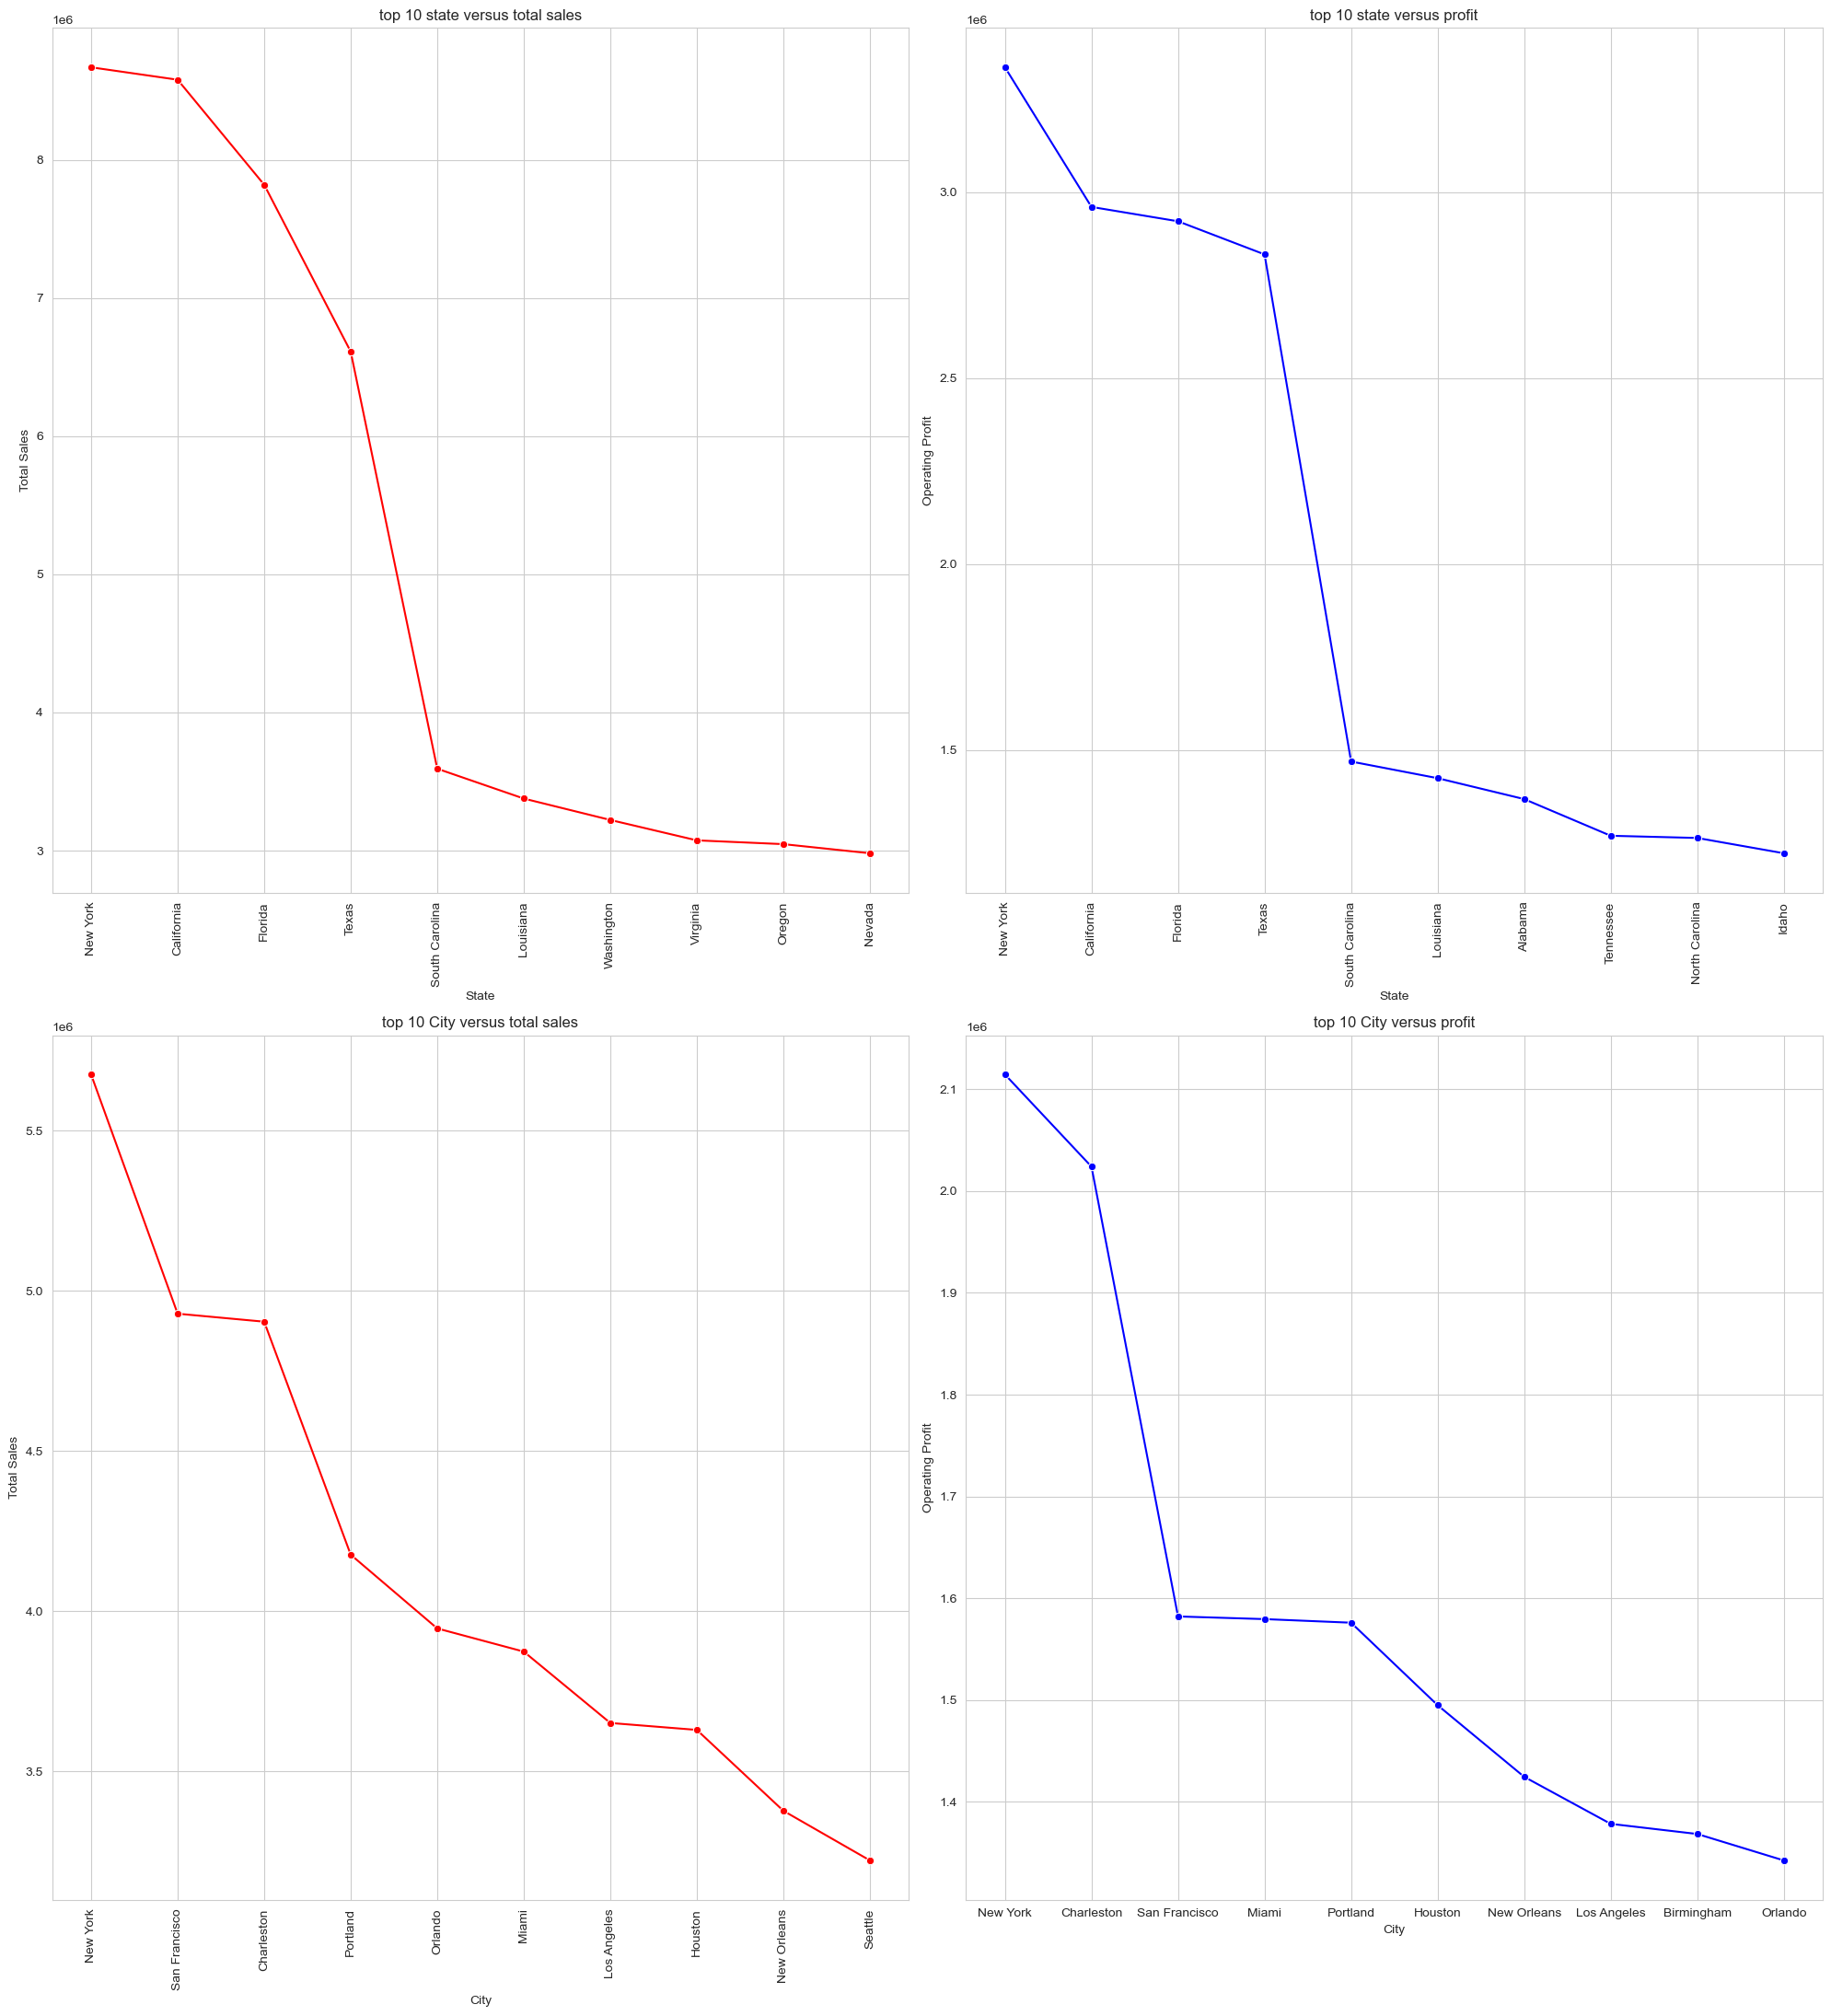

In [496]:
#What is The Top 10 State have Profit and Total Sales ?
#Top 10 states 
topSales10state=df.groupby("State")["Total Sales"].sum().nlargest(10).reset_index()
topPorfit10state=df.groupby("State")["Operating Profit"].sum().nlargest(10).reset_index()
topSales10City=df.groupby("City")["Total Sales"].sum().nlargest(10).reset_index()
topPorfit10City=df.groupby("City")["Operating Profit"].sum().nlargest(10).reset_index()


fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(20,22))
sns.lineplot(data=topSales10state, x="State", y="Total Sales", marker="o", color="red", ax= axes[0,0])
axes[0,0].set_title("top 10 state versus total sales")
axes[0,0].tick_params(axis="x", rotation=90)

sns.lineplot(data=topPorfit10state, x="State", y="Operating Profit", marker="o", color="blue", ax=axes[0,1])
axes[0,1].set_title("top 10 state versus profit")
axes[0,1].tick_params(axis="x", rotation=90)

sns.lineplot(data=topSales10City, x="City", y="Total Sales", marker="o", color="red", ax=axes[1,0])
axes[1,0].set_title("top 10 City versus total sales")
axes[1,0].tick_params(axis="x", rotation=90)

sns.lineplot(data=topPorfit10City, x="City", y="Operating Profit", marker="o", color="blue", ax=axes[1,1])
axes[1,1].set_title("top 10 City versus profit")
plt.tight_layout()
plt.show()

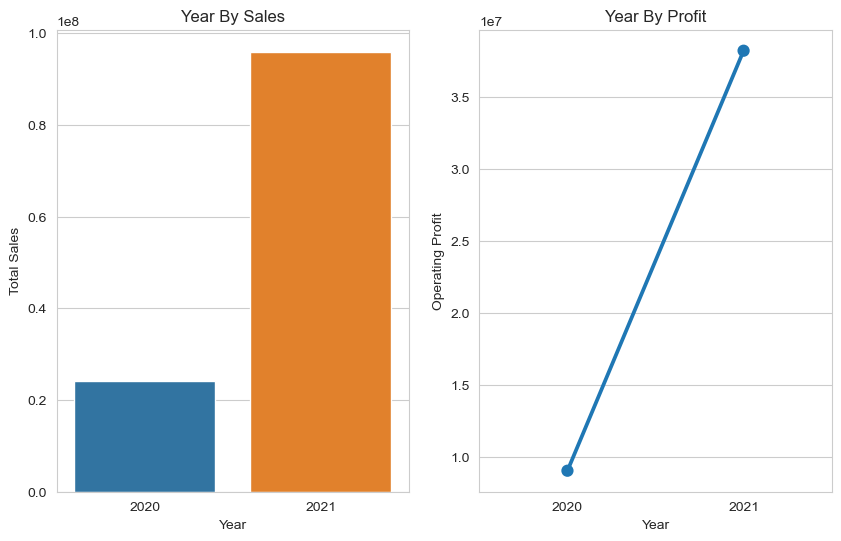

In [540]:
#profit_versus yearpr
profityear=df.groupby("Year")[["Total Sales","Operating Profit"]].sum().reset_index().sort_values(by="Total Sales")
profityear

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(data=profityear, x="Year", y="Total Sales")
plt.title("Year By Sales")

plt.subplot(1,2,2)
sns.pointplot(data=profityear, x="Year", y="Operating Profit")
plt.title("Year By Profit")
plt.show()

In [544]:
#correlation between sales and profit 
np.corrcoef(df["Total Sales"] ,df["Operating Profit"])

array([[1.        , 0.93537166],
       [0.93537166, 1.        ]])

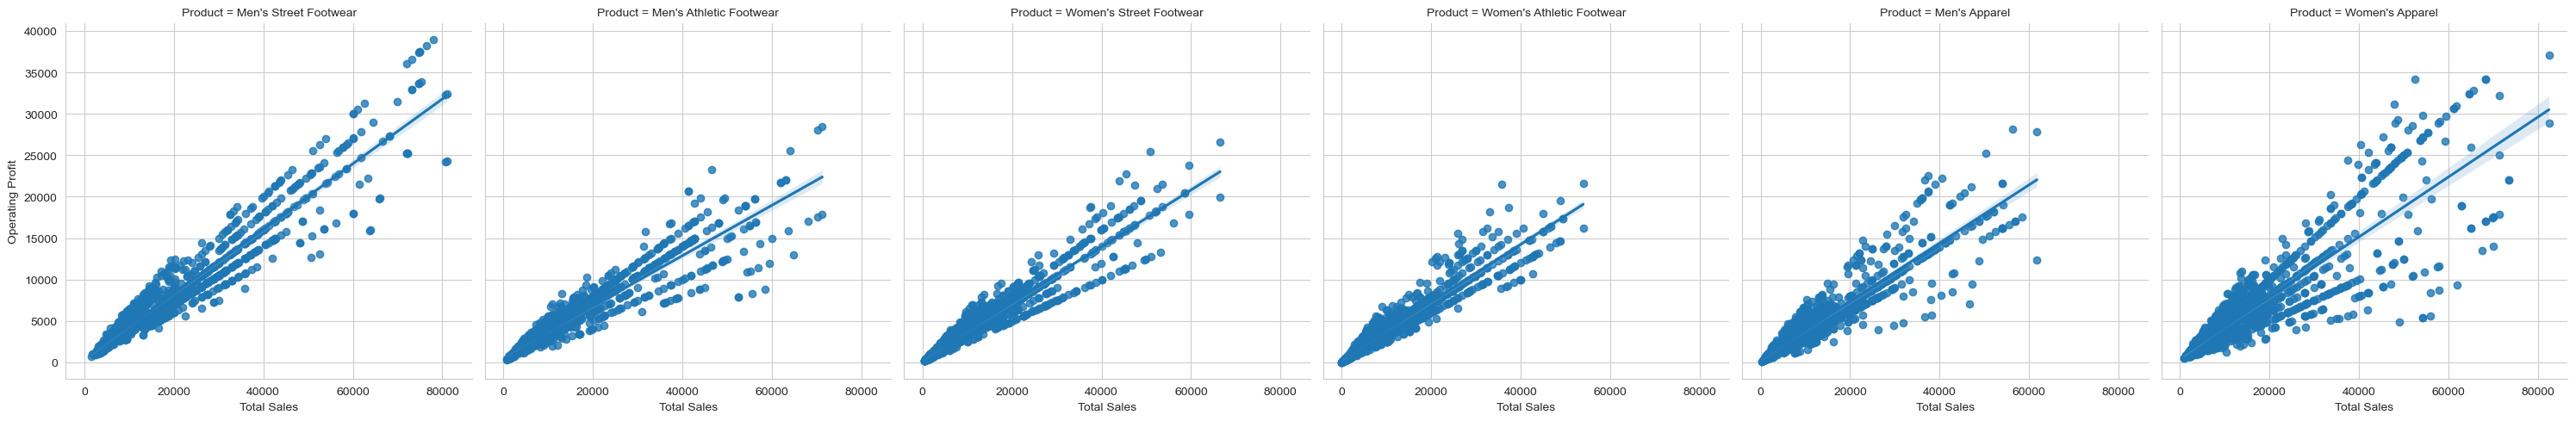

In [548]:
sns.lmplot(data = df , x= "Total Sales" , y = "Operating Profit" ,col="Product")